## Librerias Necesarias

In [27]:
import numpy as np
import CPMP_attention_model as cpmp_att
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

## Funciones para entrenamiento y predicciones

In [2]:
#************ | expand_dims_cpmp() | **************#
# El proposito de esta función es expandir las     #
# dimensiones de un estado menor para que pueda    #
# ser predicho un por modelo para un estado mayor. #
#                                                  #
# Input:                                           #
#     - data: Lista de matrices con todos los      #
#             estados.                             #
#     - labels: lista de posibles stacks de origen #
#               o destino.                         #
#     - stacks: Cantidad de stacks permitidos por  #    
#               el modelo.                         #
#     - height: Altura máxima de los stacks        #
#               permitidos por el modelo.          #
#                                                  #
# Output:                                          #
#      Retona un arreglo de los datos              #
#      redimensionados con sus respectivos labels. #
def expand_dims_cpmp(data, labels, stacks, height):
    size = data.shape[1]
    tuple_data = zip(data, labels)
    data_2 = []
    labels_2 = []

    for matrix, label in tuple_data:
        matrix = matrix.tolist()
        label = label.tolist()
        for i in range(stacks - size):
            matrix.append([1] + [1 for n in range(height)])
            label.append(0)

        data_2.append(matrix)
        labels_2.append(label)

    return np.array(data_2), np.array(labels_2)

In [3]:
#************* | is_equal() | **************#
# El proposito de esta función es verificar #
# si los datos ingresados en dos arreglos   #
# son exactamente iguales independiente de  #
# su posición.                              #
#                                           #
# Input:                                    #
#     - array1: Primer arreglo que se       #
#               desea comparar.             #
#     - array2: Segundo arreglo que se      #
#               desea comparar.             #
# Output:                                   #
#     Retorna true en el caso de tener      #
#     cada dato exactamente igual o         #
#     False en caso contrario.              #
def is_equal(array1, array2):
    size = len(array1)
    cant = 0
    array1.sort()
    array2.sort()

    for i in range(size):
        if array1[i] == array2[i]:
            cant += 1

    if cant == size: return True

    return False

In [4]:
#***************** | precision() | ***************#
# El proposito de esta función es verificar si    #
# los valores predichos por una red neuronal son  #
# correctos o no.                                 #
#                                                 #
# Input:                                          #
#     - y_predict: Valores predichos por el       #
#                  mecanismo de machine learning. #
#     - y_test: Valores reales de los casos       #
#               predichos.                        #
# Output:                                         #
#     Retorna una proporción entre los valores    #
#     predichos correctamente sobre la cantidad   #
#     de datos.                                   #
def precision(y_predict, y_test):
    size = len(y_predict)
    predict = 0

    for i in range(size):
        if np.argmax(y_predict[i]) == np.argmax(y_test[i]):
            predict += 1
    
    return predict / size

In [5]:
#************** | precision_for_multiclass() | ***************#
# El proposito de esta función es verificar si los valores    #
# predichos por un mecanismo de machine learning para         #
# clasificación multiclase están correctos o no.              #
#                                                             # 
# Input:                                                      #
#     - y_predict: Valores predichos por el mecanismo de      #
#                  machine learning.                          #
#     - y_test: Valores reales de cada caso.                  #
# Output:                                                     #
#     Retorna una proporción entre los valores predichos      #
#     correctamente sobre la cantidad total de casos.         #
def cosine_Similarity(y_predict, y_test):
    size = len(y_predict)
    suma = 0

    for i in range(size):
        result = np.dot(y_predict[i], y_test[i]) / (np.linalg.norm(y_predict[i]) * np.linalg.norm(y_test[i]))
        suma += result
    
    return suma / size

## Funciones para cargar y guardar data

In [6]:
#************** | load_data() | ************#
# El proposito de esta función es cargar    #
# los datos almacenados en un csv para el   #
# entrenamiento de la red neuronal.         #
#                                           #
# Input:                                    #
#     - name: Nombre del archivo con su     #
#             dirección correspondiente     #
#             sin el .csv.                  #
#                                           #
# Output:                                   #
#      Retorna 3 arreglos, el primero       #
#      corresponde a una lista de estados,  #
#      el segundo a una lista de labels     #
#      de stacks de origen y por último una #
#      lista de posibles stacks de destino. #
def load_data(name):
    data = []
    labels_1 = []
    labels_2 = []

    with open(name + '.csv', 'r') as archivo:
        total = int(archivo.readline().split(':')[1])
        line = archivo.readline().split(':')
        size_stacks = int(line[1].split(',')[0])
        size_height = int(line[2])
        archivo.readline()

        for i in range(total):
            matrix = archivo.readline().split(':')[1].split(',')
            matrix = np.array(matrix, dtype= float)
            matrix = np.reshape(matrix, (size_stacks, size_height))

            label_1 = archivo.readline().split(':')[1].split(',')
            label_1 = np.array(label_1, dtype= float)
            label_2 = archivo.readline().split(':')[1].split(',')
            label_2 = np.array(label_2, dtype= float)

            data.append(matrix)
            labels_1.append(label_1)
            labels_2.append(label_2)

            archivo.readline()

    return np.stack(data), np.stack(labels_1), np.stack(labels_2)

In [7]:
def load_data_2(name: str) -> tuple:
    data = []
    labels = []

    with open(name + '.csv', 'r') as archivo:
        total = int(archivo.readline().split(':')[1])
        line = archivo.readline().split(':')
        size_stacks = int(line[1].split(',')[0])
        size_height = int(line[2])
        archivo.readline()

        for i in range(total):
            matrix = archivo.readline().split(':')[1].split(',')
            matrix = np.array(matrix, dtype= float)
            matrix = np.reshape(matrix, (size_stacks, size_height))

            label_1 = archivo.readline().split(':')[1].split(',')
            label_1 = np.array(label_1, dtype= float)

            data.append(matrix)
            labels.append(label_1)

            archivo.readline()

    return np.stack(data), np.stack(labels)

In [8]:
def load_data_multi(name):
    data = []
    data_2 = []
    labels_1 = []
    labels_2 = []

    with open(name + '_so.csv', 'r') as archivo:
        total = int(archivo.readline().split(':')[1])
        line = archivo.readline().split(':')
        size_stacks = int(line[1].split(',')[0])
        size_height = int(line[2])
        archivo.readline()

        for i in range(total):
            matrix = archivo.readline().split(':')[1].split(',')
            matrix = np.array(matrix, dtype= float)
            matrix = np.reshape(matrix, (size_stacks, size_height))

            label_1 = archivo.readline().split(':')[1].split(',')
            label_1 = np.array(label_1, dtype= float)

            data.append(matrix)
            labels_1.append(label_1)

            archivo.readline()

    with open(name + '_sd.csv', 'r') as archivo:
        total = int(archivo.readline().split(':')[1])
        line = archivo.readline().split(':')
        size_stacks = int(line[1].split(',')[0])
        size_height = int(line[2])
        archivo.readline()

        for i in range(total):
            matrix = archivo.readline().split(':')[1].split(',')
            matrix = np.array(matrix, dtype= float)
            matrix = np.reshape(matrix, (size_stacks, size_height))

            label_2 = archivo.readline().split(':')[1].split(',')
            label_2 = np.array(label_2, dtype= float)

            data_2.append(matrix)
            labels_2.append(label_2)

            archivo.readline()

    return np.stack(data), np.stack(data_2), np.stack(labels_1), np.stack(labels_2)

# Cargar Modelos

In [9]:
model_5x5_multi = cpmp_att.CPMP_attention_model()
model_5x5_multi.set_model('models/model_cpmp_5x5.h5')

Cause: mangled names are not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: mangled names are not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


AttributeError: Exception encountered when calling layer "concatenation_layer" (type ConcatenationLayer).

in user code:

    File "c:\Users\thoma\OneDrive\Documentos\CPMP_With_attention\Layers.py", line 52, in call  *
        matriz_identidad = tf.eye(inputs.shape[-1], dtype=tf.float32)

    AttributeError: 'list' object has no attribute 'shape'


Call arguments received by layer "concatenation_layer" (type ConcatenationLayer):
  • inputs=['tf.Tensor(shape=(None, 5, 6), dtype=float32)', 'tf.Tensor(shape=(None, 5), dtype=float32)']

In [ ]:
model_7x7_multi = cpmp_att.CPMP_attention_model()
model_7x7_multi.set_model('models/model_cpmp_7x7.h5')

# Cargar Data

In [ ]:
data_5x5, labels_5x5 = load_data_2('Data_CPMP/Data_Model_v2/data_5x5_Multiple')

In [ ]:
data_7x7, labels_7x7 = load_data_2('data/data_7x7_Multiple')

FileNotFoundError: [Errno 2] No such file or directory: 'data/data_7x7_Multiple.csv'

In [12]:
data_7x7, labels_7x7 = load_data_2('data/data_7x7_Multiple')

# Modelo con Varias Salidas

## Modelo 5x5

In [ ]:
model_5x5_multi = cpmp_att.CPMP_attention_model()

In [ ]:
model_5x5_multi.create_model(num_layer_attention_add= 2, heads= 5, S= 5, H= 5, optimizer= 'Adam')

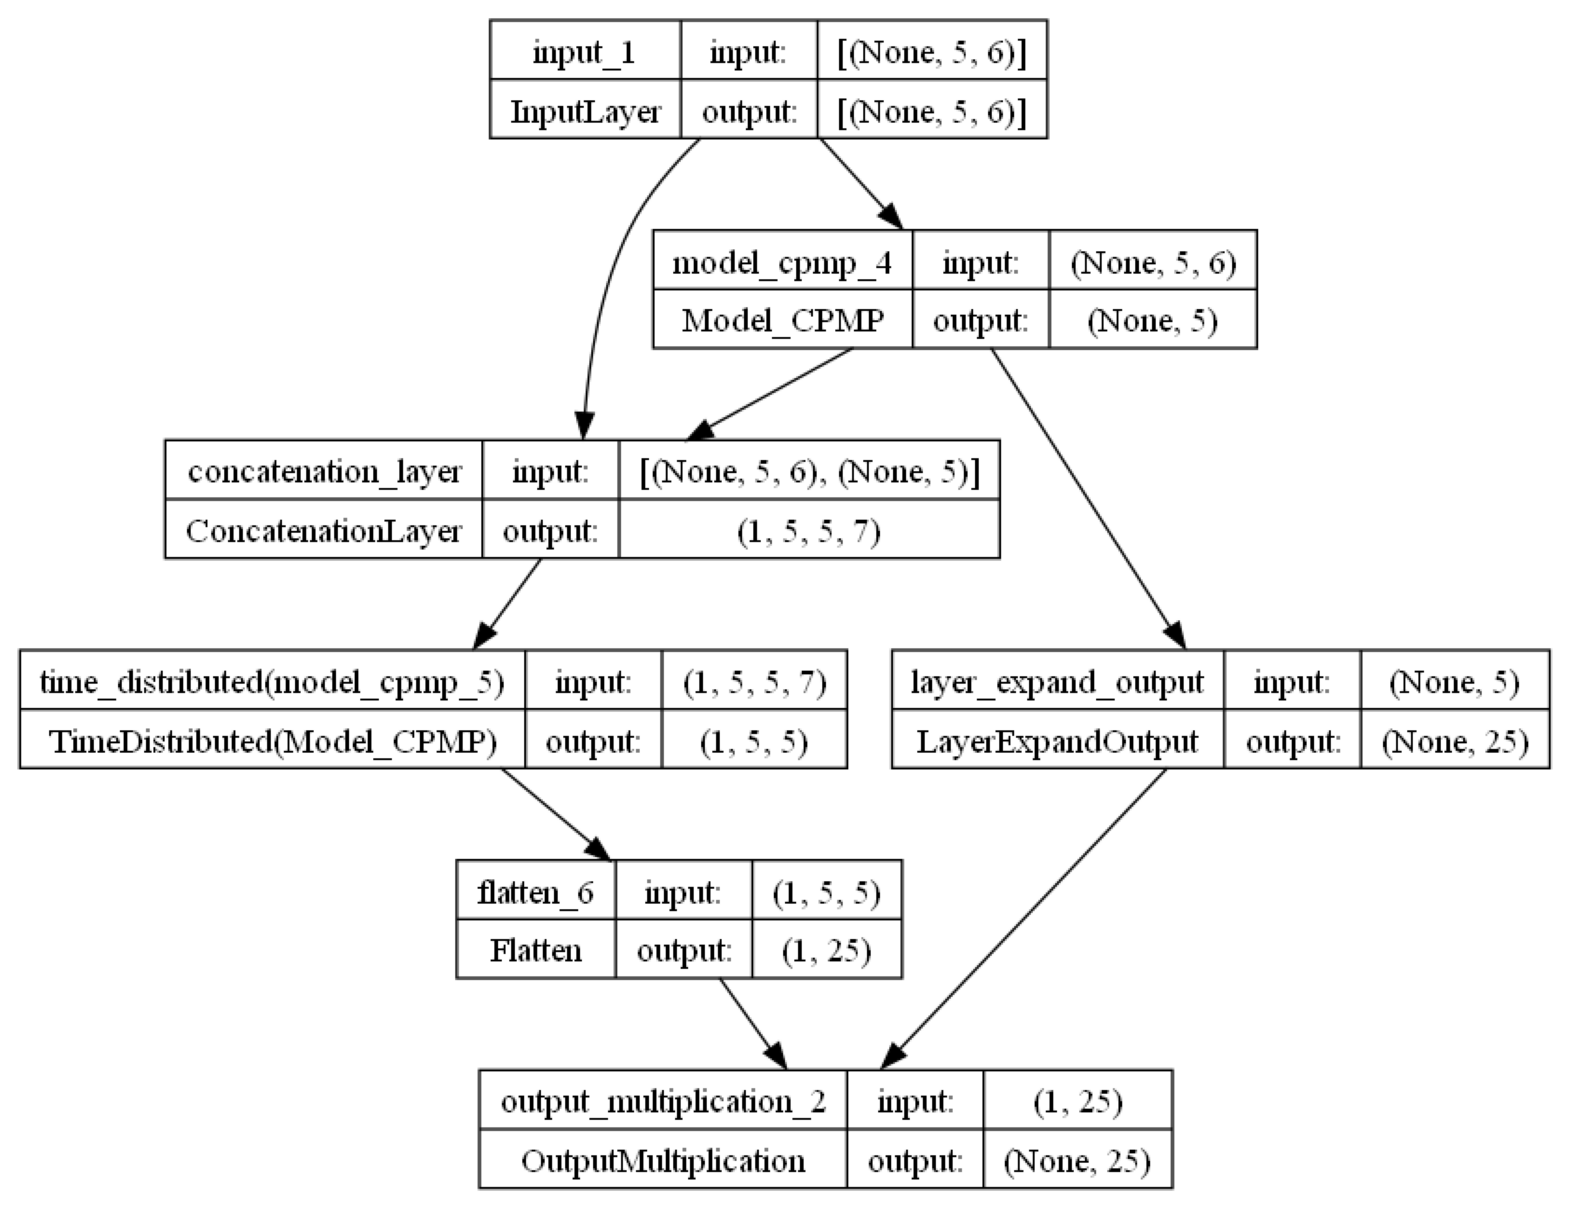

In [ ]:
model_5x5_multi.plot_model(name= 'images_models/model_cpmp_multi')

### Entrenamiento

In [ ]:
X_train_5x5, X_test_5x5, y_train_5x5, y_test_5x5 = train_test_split(data_5x5, labels_5x5, 
                                                                    test_size= 0.2, random_state= 42)

In [ ]:
records = model_5x5_multi.fit(X_train_5x5, y_train_5x5, epochs= 50, verbose= True)

Epoch 1/50


ValueError: in user code:

    File "c:\Users\thoma\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\thoma\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\thoma\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\thoma\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1080, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\thoma\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\thoma\AppData\Local\Temp\__autograph_generated_filer3xwa67n.py", line 16, in tf__call
        results = ag__.converted_call(ag__.converted_call(ag__.ld(Concatenate), (), dict(axis=3), fscope), ([ag__.ld(matrices_copiadas), ag__.ld(test)],), None, fscope)

    ValueError: Exception encountered when calling layer 'concatenation_layer' (type ConcatenationLayer).
    
    in user code:
    
        File "c:\Users\thoma\OneDrive\Documentos\CPMP_With_attention\Layers.py", line 60, in call  *
            results = Concatenate(axis= 3)([matrices_copiadas, test])
        File "c:\Users\thoma\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler  **
            raise e.with_traceback(filtered_tb) from None
        File "c:\Users\thoma\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\merging\concatenate.py", line 131, in build
            raise ValueError(err_msg)
    
        ValueError: A `Concatenate` layer requires inputs with matching shapes except for the concatenation axis. Received: input_shape=[(32, 5, 5, 6), (1, 5, 5, 1)]
    
    
    Call arguments received by layer 'concatenation_layer' (type ConcatenationLayer):
      • inputs=['tf.Tensor(shape=(32, 5, 6), dtype=float32)', 'tf.Tensor(shape=(32, 5), dtype=float32)']


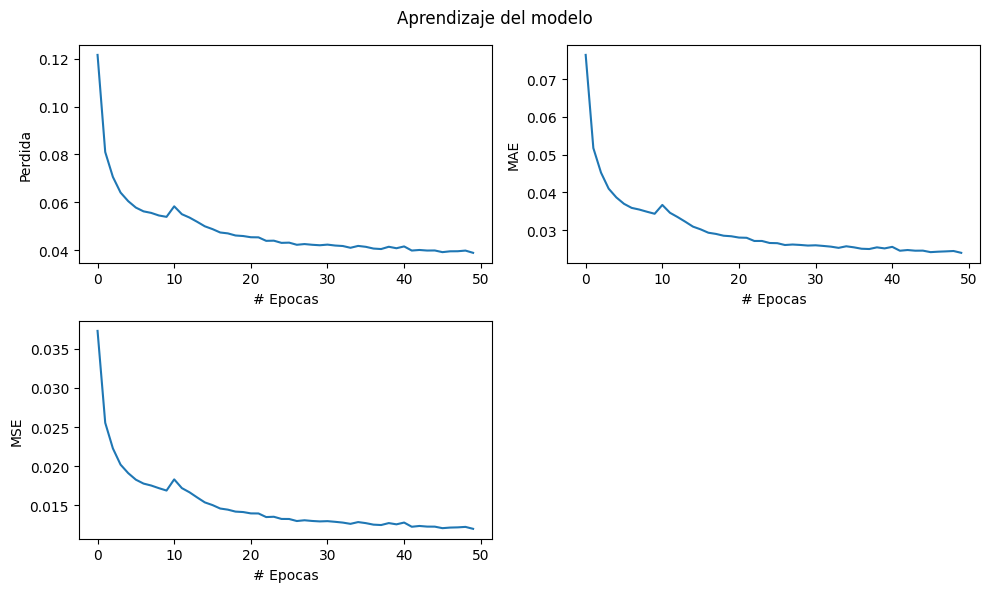

In [ ]:
plt.figure(figsize= (10, 6))

plt.subplot(2, 2, 1)
plt.xlabel("# Epocas")
plt.ylabel("Perdida")
plt.plot(records.history['loss'])

plt.subplot(2, 2, 2)
plt.xlabel("# Epocas")
plt.ylabel("MAE")
plt.plot(records.history['mae'])

plt.subplot(2, 2, 3)
plt.xlabel("# Epocas")
plt.ylabel("MSE")
plt.plot(records.history['mse'])

plt.suptitle('Aprendizaje del modelo')
plt.tight_layout()
plt.show()

In [ ]:
predict = model_5x5_multi.predict(X_test_5x5)

1563/1563 [==============================] - 11s 7ms/step


In [ ]:
results_1 = cosine_Similarity(predict, y_test_5x5)
results_2 = mean_absolute_error(y_test_5x5, predict)
results_3 = mean_squared_error(y_test_5x5, predict)

print(f'Precisión del modelo: {round(results_1 * 100, 3)}%')
print(f'Error Absoluto Medio: {round(results_2 * 100, 3)}%')
print(f'Error cuadratico medio: {round(results_3 * 100, 3)}%')

Precisión del modelo: 94.739%
Error Absoluto Medio: 2.158%
Error cuadratico medio: 1.041%


## Modelo 7x7

In [ ]:
model_7x7_multi = cpmp_att.CPMP_attention_model()

In [ ]:
model_7x7_multi.create_model(num_layer_attention_add= 2, heads= 5, S= 7, H= 7, optimizer= 'Adam')

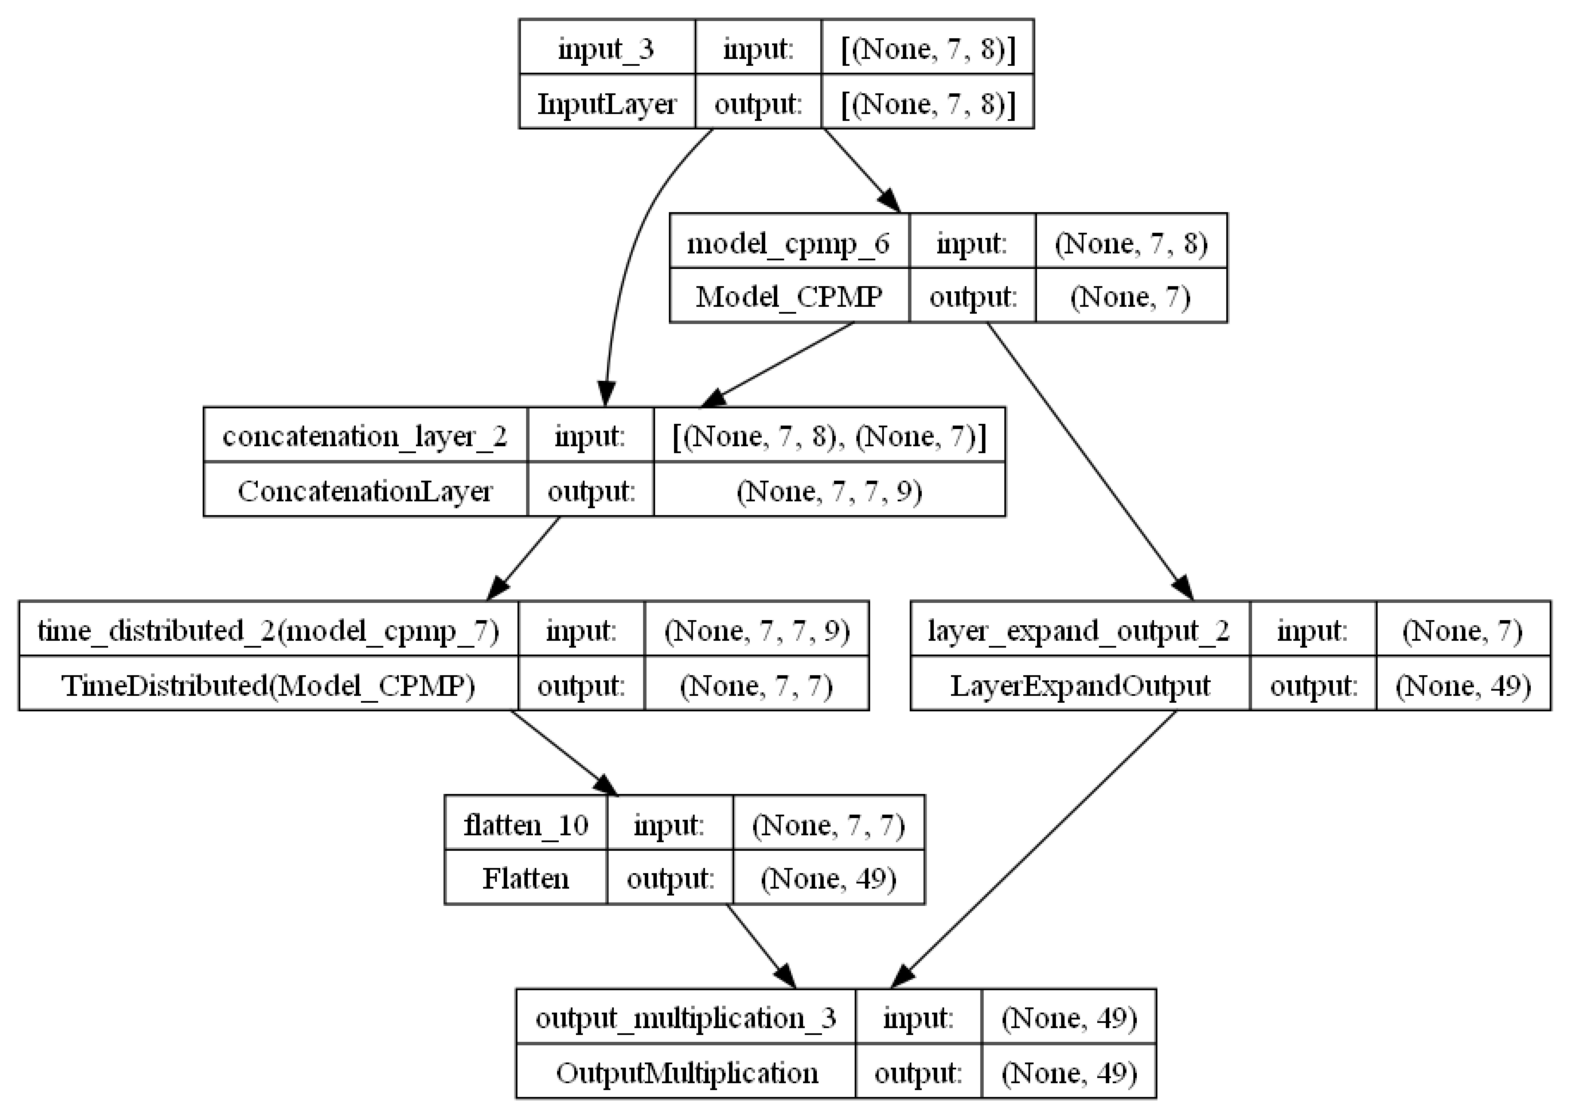

In [ ]:
model_7x7_multi.plot_model(name= 'images_models/model_cpmp_multi')

### Entrenamiento

In [ ]:
X_train_7x7, X_test_7x7, y_train_7x7, y_test_7x7 = train_test_split(data_7x7, labels_7x7, 
                                                                    test_size= 0.2, random_state= 42)

In [ ]:
records = model_7x7_multi.fit(X_train_7x7, y_train_7x7, epochs= 50, verbose= True)

Epoch 1/50
2500/2500 [==============================] - 45s 14ms/step - loss: 0.1254 - mae: 0.0702 - mse: 0.0340
Epoch 2/50
2500/2500 [==============================] - 34s 13ms/step - loss: 0.0682 - mae: 0.0424 - mse: 0.0210
Epoch 3/50
2500/2500 [==============================] - 32s 13ms/step - loss: 0.0580 - mae: 0.0355 - mse: 0.0177
Epoch 4/50
2500/2500 [==============================] - 38s 15ms/step - loss: 0.0551 - mae: 0.0337 - mse: 0.0168
Epoch 5/50
2500/2500 [==============================] - 38s 15ms/step - loss: 0.0535 - mae: 0.0327 - mse: 0.0163
Epoch 6/50
2500/2500 [==============================] - 43s 17ms/step - loss: 0.0521 - mae: 0.0319 - mse: 0.0159
Epoch 7/50
2500/2500 [==============================] - 54s 22ms/step - loss: 0.0513 - mae: 0.0314 - mse: 0.0157
Epoch 8/50
2500/2500 [==============================] - 46s 19ms/step - loss: 0.0507 - mae: 0.0311 - mse: 0.0155
Epoch 9/50
2500/2500 [==============================] - 56s 23ms/step - loss: 0.0507 - mae: 0.03

In [ ]:
predict = model_7x7_multi.predict(X_test_7x7)

625/625 [==============================] - 4s 5ms/step


In [ ]:
results_1 = cosine_Similarity(predict, y_test_7x7)
results_2 = mean_absolute_error(y_test_7x7, predict)
results_3 = mean_squared_error(y_test_7x7, predict)

print(f'Precisión del modelo: {round(results_1 * 100, 3)}%')
print(f'Error Absoluto Medio: {round(results_2 * 100, 3)}%')
print(f'Error cuadratico medio: {round(results_3 * 100, 3)}%')

Precisión del modelo: 90.463%
Error Absoluto Medio: 1.998%
Error cuadratico medio: 1.05%
